<div align="center">

# Centro Latinoamericano de Excelencia en Cambio Climático y Salud de la Universidad Peruana Cayetano Heredia 
    
</div>

<img src="clima.jpeg">

## Datos públicos del CMIP6 : Ejemplo básico en python


### Este notebook muestra cómo consultar otro catalogo y cargar los datos utilizando python y plotearlos

#### Plot CMIP6 Data con xarray

##### Manipulación de datos netCDF con Python para la investigación del cambio climático: Datos del modelo CMIP6 

In [100]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

##### DEPENDIENDO DE TU INTERNET y TU PROCESADOR PUEDES PREPARTE UN CAFE :)

<img src="cafe.jpeg">

## Aca vamos a consultar los datos de via THREDDS del repositorio de UCAR-NCAR

https://esgf-data.ucar.edu/thredds/catalog/esgcet/catalog.html visitar esta pagina para mas información.

In [42]:
!wget http://esgf-data.ucar.edu/thredds/fileServer/esg_dataroot/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/tas/gn/v20190308/tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc

--2021-07-05 12:05:03--  http://esgf-data.ucar.edu/thredds/fileServer/esg_dataroot/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/tas/gn/v20190308/tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc
Resolving esgf-data.ucar.edu... 128.117.181.74
Connecting to esgf-data.ucar.edu|128.117.181.74|:80... connected.
HTTP request sent, awaiting response... 200 200
Length: 243034487 (232M) [application/x-netcdf]
Saving to: 'tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc'

tas_Amon_CESM2_hist 100%[===================>] 231.78M  6.43MB/s    in 35s     

2021-07-05 12:05:38 (6.57 MB/s) - 'tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc' saved [243034487/243034487]



In [101]:
filename = 'tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc'

Acá vamos a llamar algunos paquetes importantes como Xarray y cftime

In [102]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import cftime

In [103]:
dset = xr.open_dataset(filename, decode_times=True, use_cftime=True)
print(dset)

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float32 ...
    lon_bnds   (lon, nbnd) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T23:34:05Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    

### En este paso hemos transformado las temperaturas a grados centigrados

In [104]:
dset['tas']=(dset['tas']-273)
print(dset['tas'])

<xarray.DataArray 'tas' (time: 1980, lat: 192, lon: 288)>
array([[[-27.677917 , -27.677917 , -27.677917 , ..., -27.677917 ,
         -27.677917 , -27.677917 ],
        [-26.894043 , -26.937622 , -27.0997   , ..., -26.833054 ,
         -26.849808 , -26.874268 ],
        [-26.274551 , -26.319061 , -26.343765 , ..., -26.011871 ,
         -26.070312 , -26.158157 ],
        ...,
        [-27.479202 , -27.431976 , -27.38681  , ..., -27.585861 ,
         -27.552551 , -27.520462 ],
        [-27.971786 , -27.959396 , -27.94661  , ..., -28.016785 ,
         -28.000488 , -27.985458 ],
        [-28.49965  , -28.49681  , -28.494232 , ..., -28.51001  ,
         -28.50621  , -28.502777 ]],

       [[-40.489273 , -40.489273 , -40.489273 , ..., -40.489273 ,
         -40.489273 , -40.489273 ],
        [-39.69989  , -39.738815 , -39.890762 , ..., -39.675873 ,
         -39.679337 , -39.689743 ],
        [-39.07437  , -39.117172 , -39.14154  , ..., -38.823364 ,
         -38.883682 , -38.961533 ],
...
     

In [105]:
dset.time.values

array([cftime.DatetimeNoLeap(1850, 1, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 14, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 15, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 15, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)

#### Ahora vamos dibujar nuestro primer mapa empezamos el primer mes y año

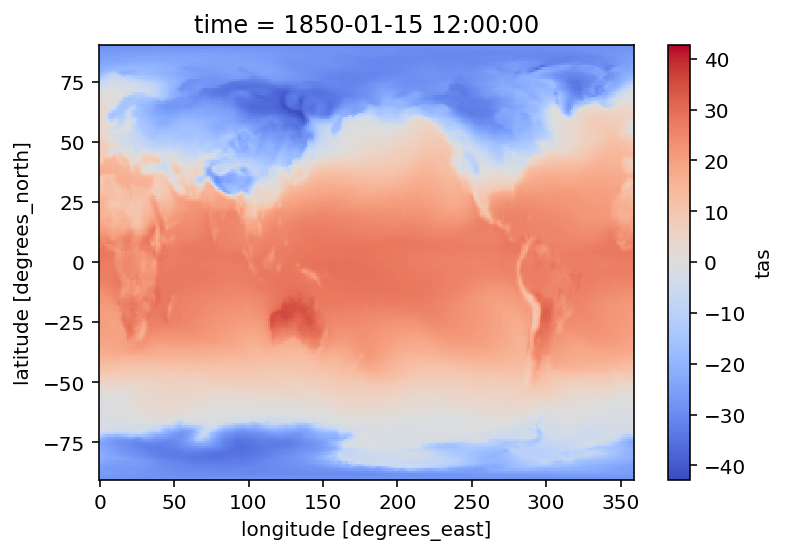

In [106]:
dset['tas'].sel(time=cftime.DatetimeNoLeap(1850, 1, 15, 12, 0, 0, 0, 2, 15)).plot(cmap = 'coolwarm')

#### Podemos cambiar a el año y dia que gustemos

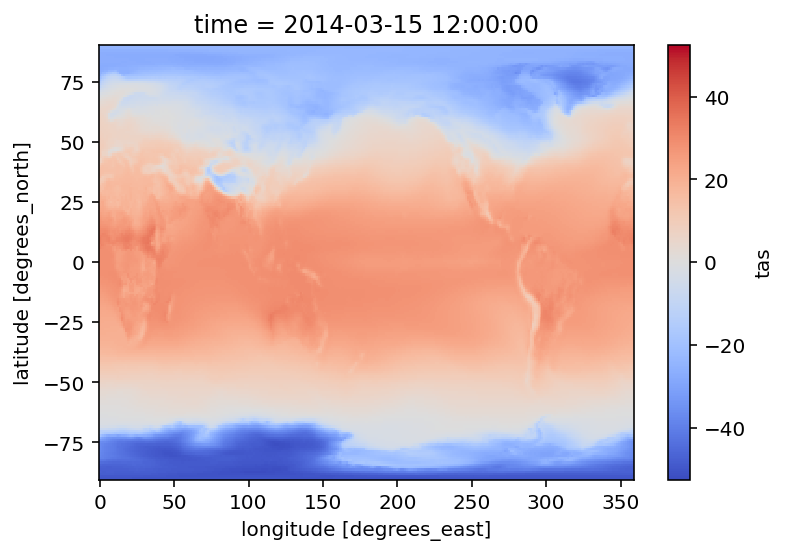

In [107]:
dset['tas'].sel(time=cftime.DatetimeNoLeap(2014, 3, 15, 12, 0, 0, 0, 2, 15)).plot(cmap = 'coolwarm')

#### Personalizar el gráfico

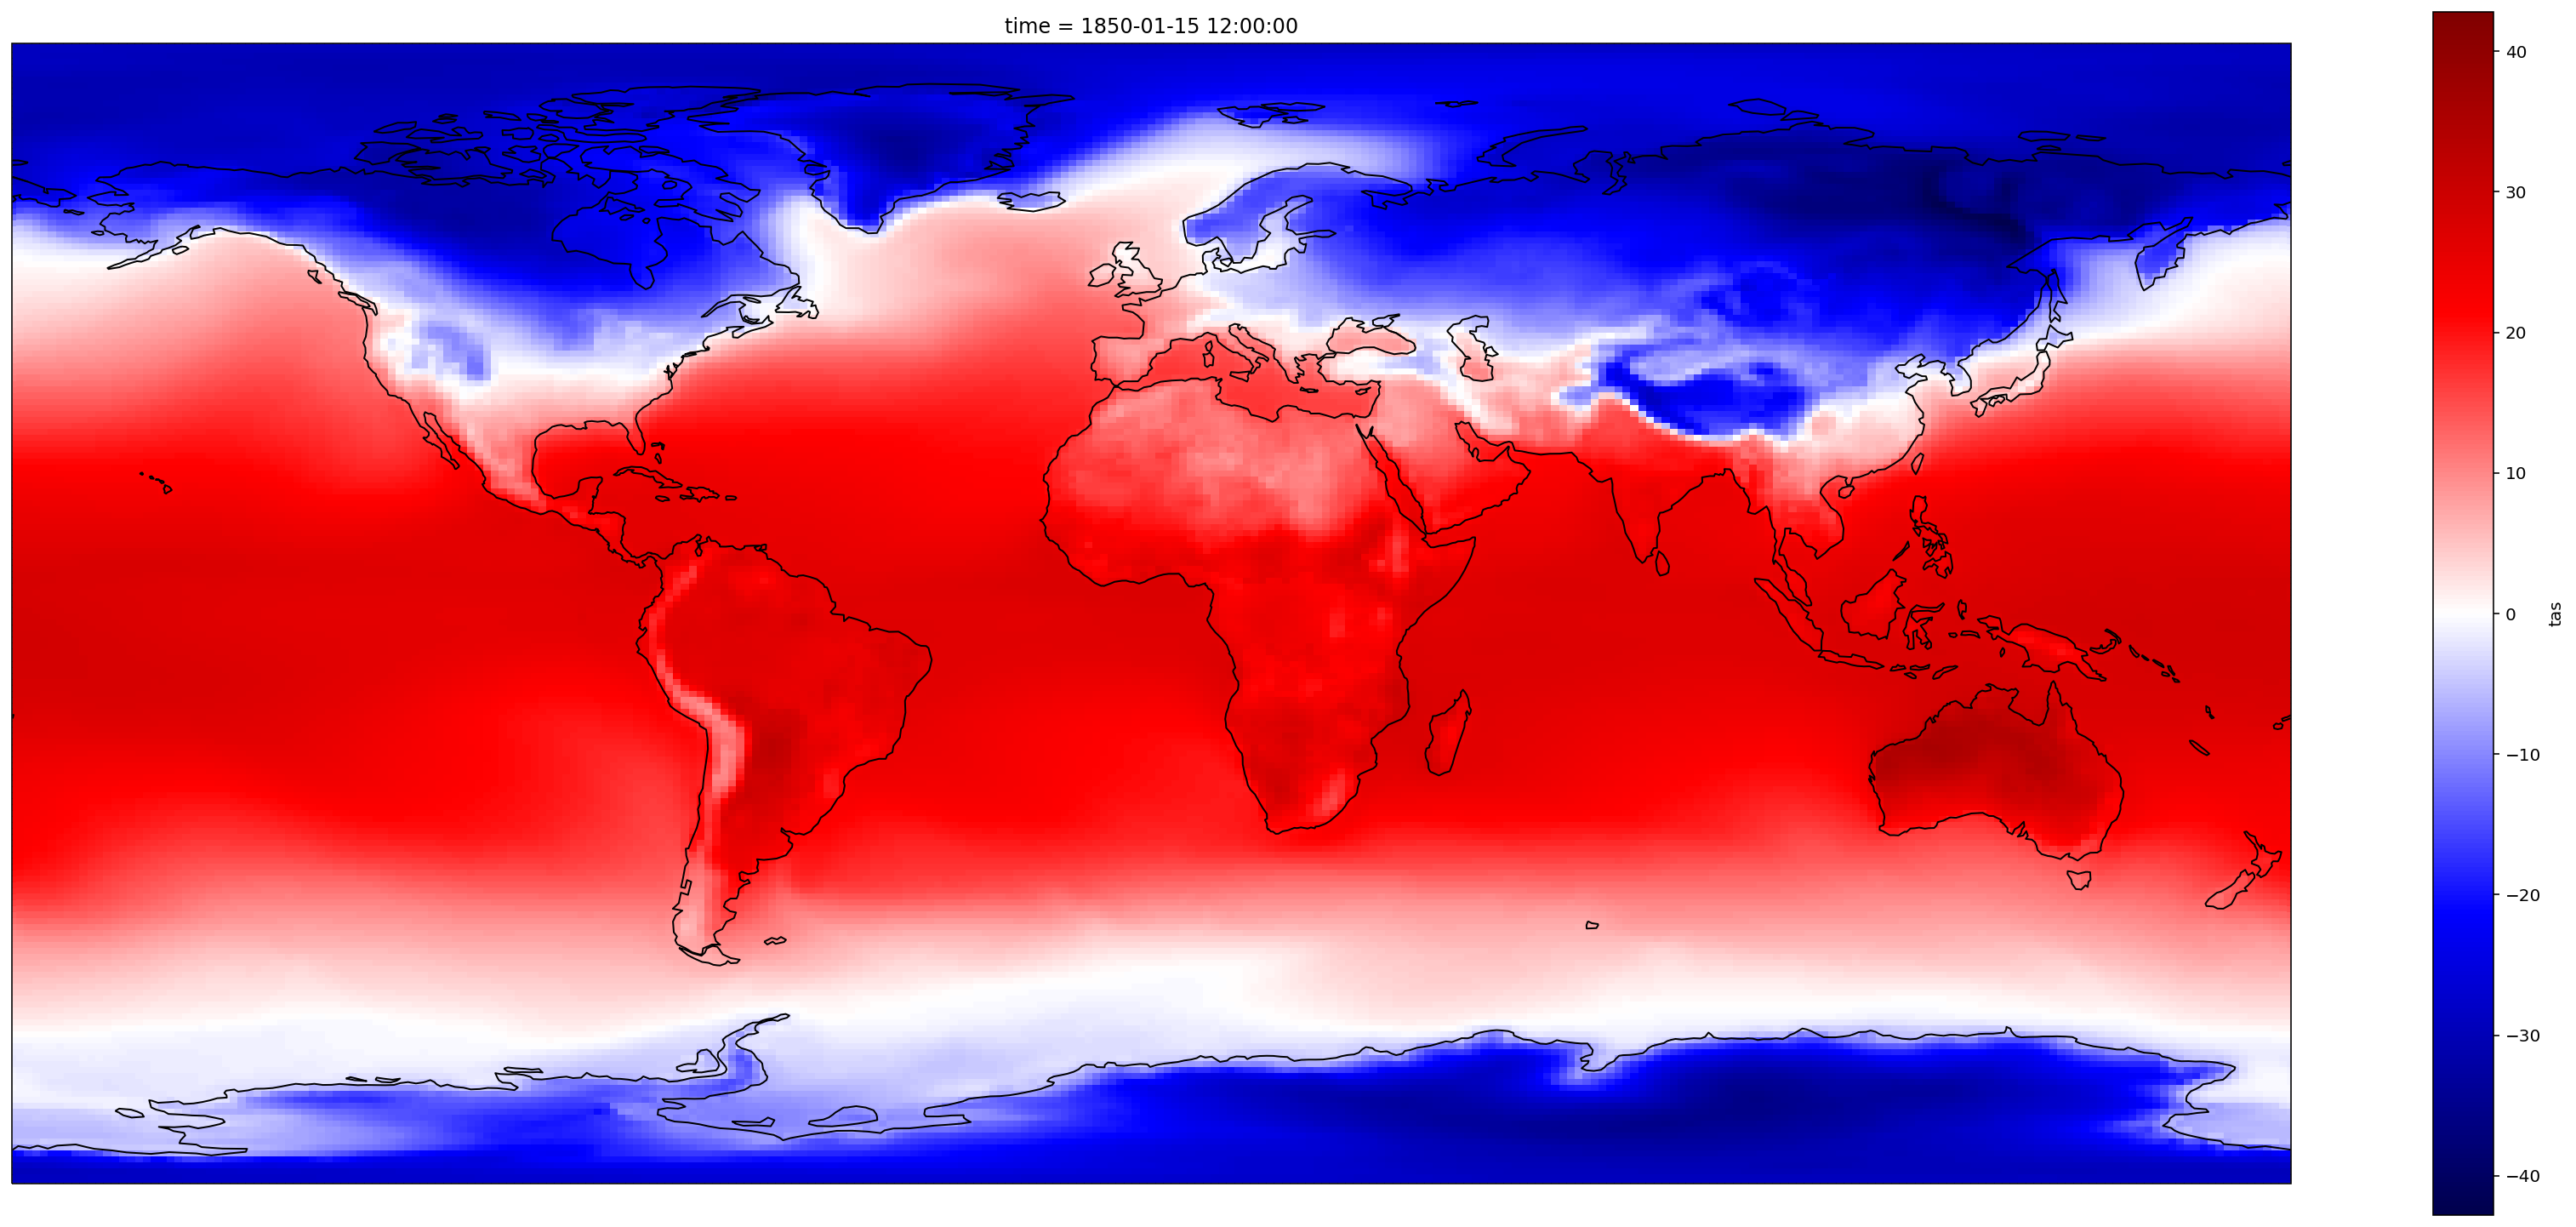

In [109]:
fig = plt.figure(1, figsize=[30,13])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
dset['tas'].isel(time=0).plot.pcolormesh(ax=ax, cmap='seismic')
fig.savefig("Temperatura_Superficial_global.png")

### Ahora vamos a usar cartopy y graficar con otra tipo de proyección

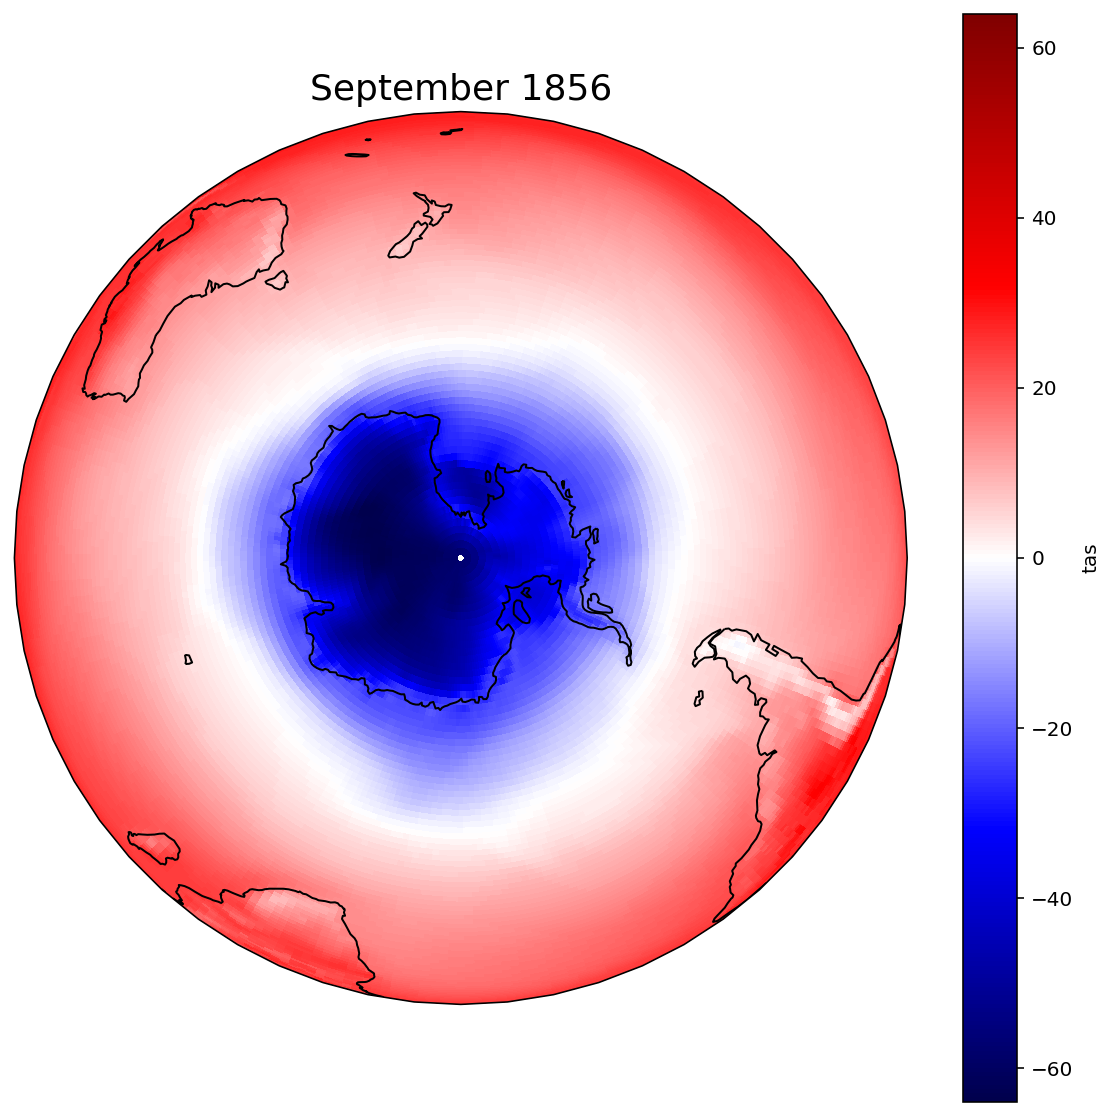

In [111]:
fig = plt.figure(1, figsize=[10,10])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(180, -90))
ax.coastlines()

# Seleccionamos el tiempo desde 0 hasta 1900

dset['tas'].isel(time=80).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic')

# Poner nuestro titulo y fecha
plt.title(dset.time.values[80].strftime("%B %Y"), fontsize=18)
fig.savefig("Temperatura_Superficial_hemisferiossur__ortographic1854.png")

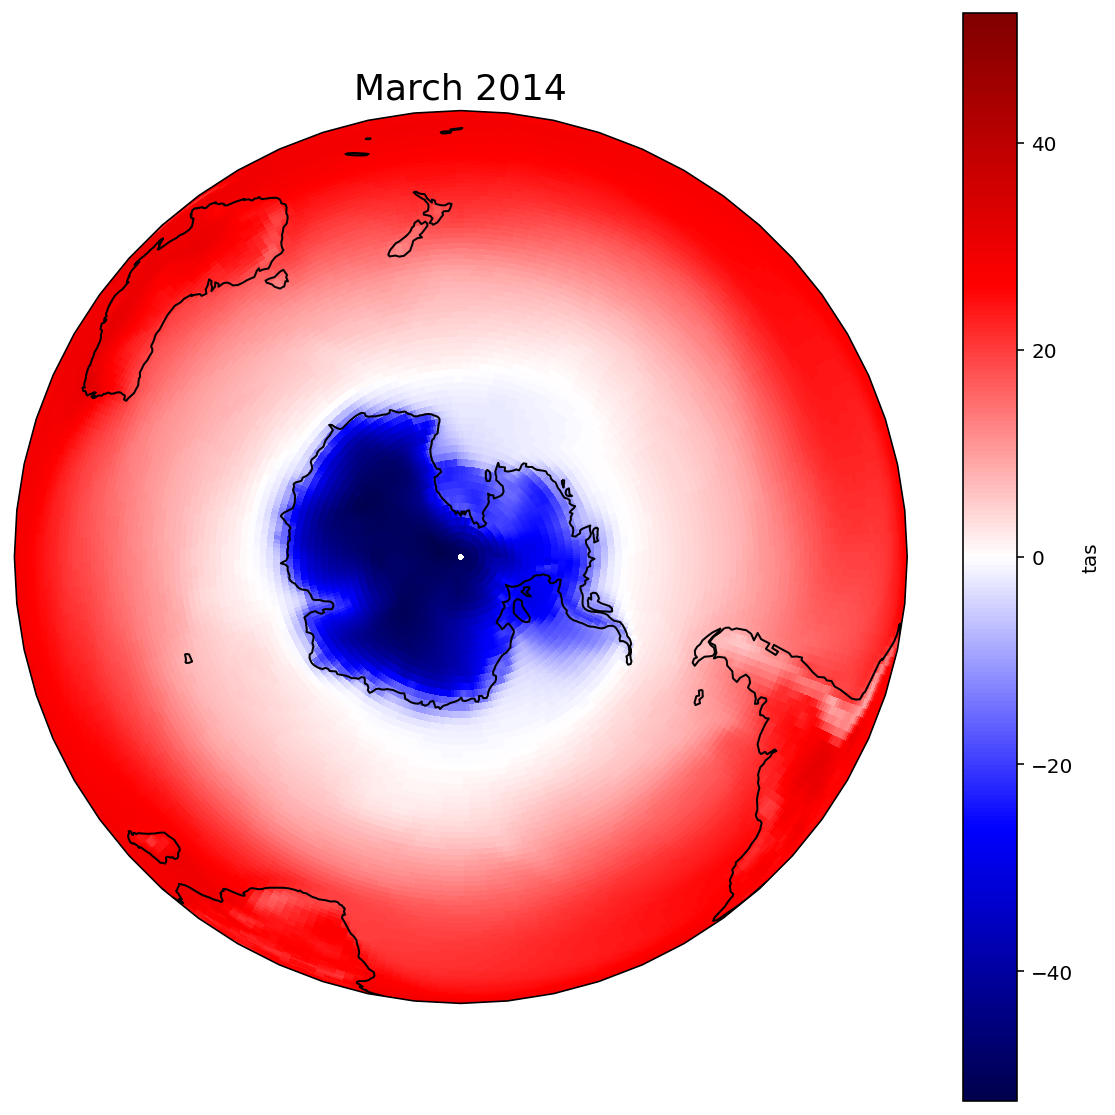

In [112]:
fig = plt.figure(1, figsize=[10,10])

# We're using cartopy and are plotting in Orthographic projection 
# (see documentation on cartopy)
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(180, -90))
ax.coastlines()

# We need to project our data to the new Orthographic projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
dset['tas'].isel(time=1970).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic')

# One way to customize your title
plt.title(dset.time.values[1970].strftime("%B %Y"), fontsize=18)
fig.savefig("Temperatura_Superficial_hemisferiossur__ortographic2014.png")

### Vamos graficar anualmente y comparar 2 años diferentes!

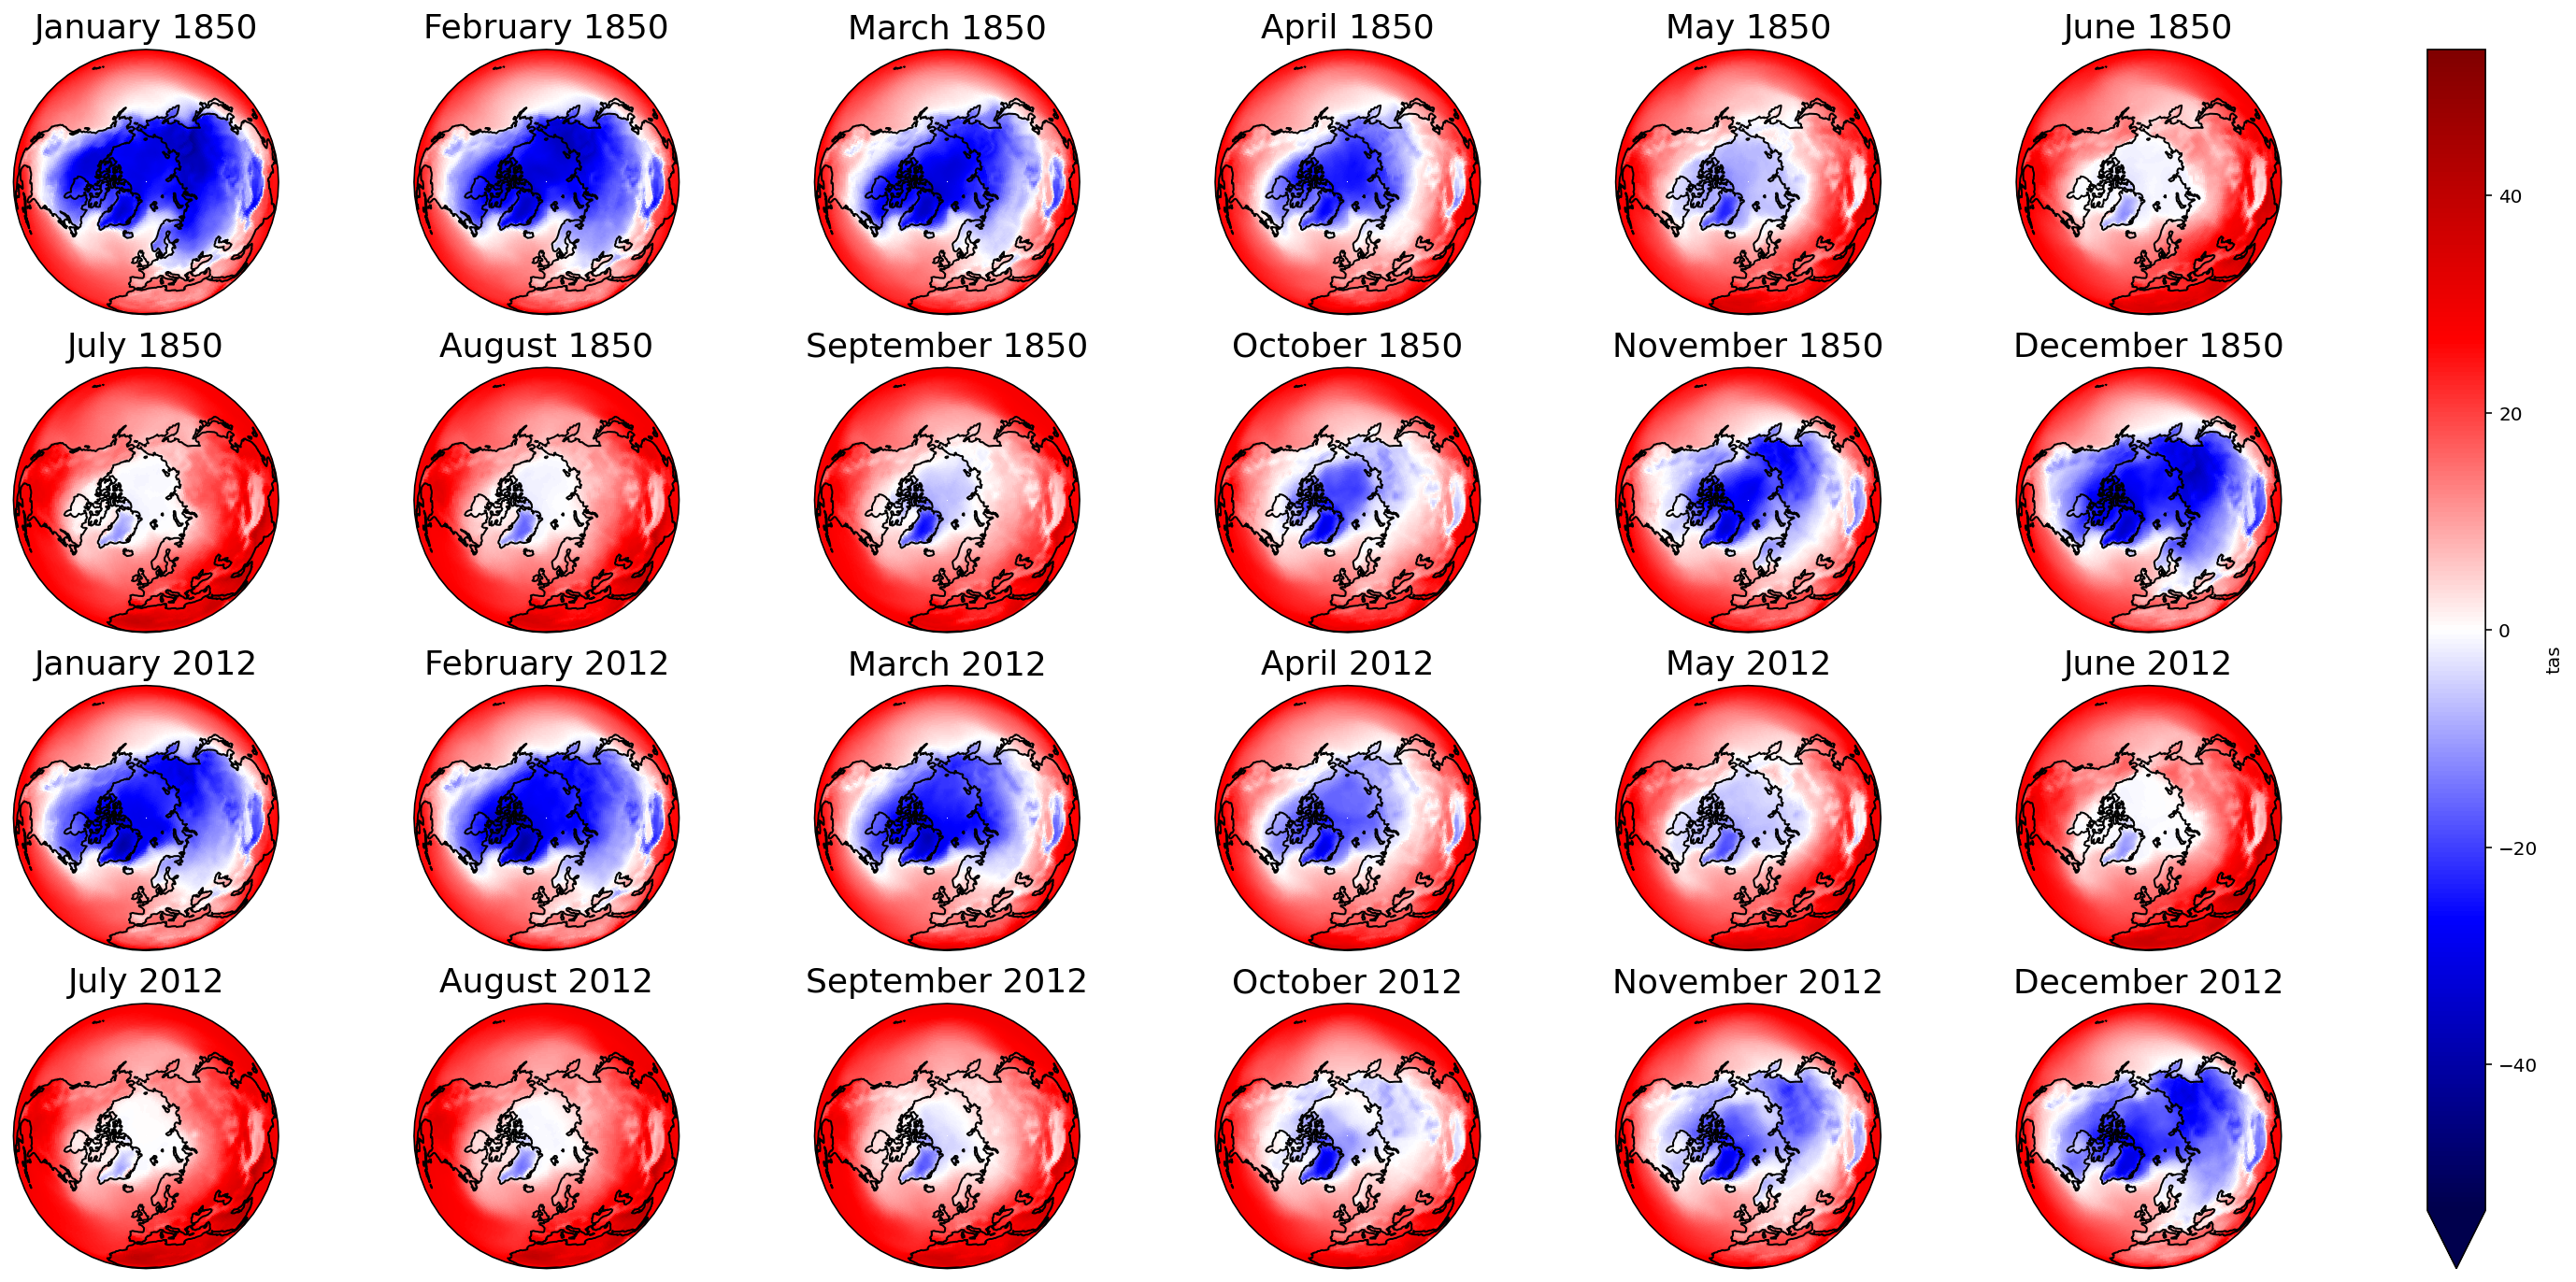

In [114]:
proj_plot = ccrs.Orthographic(0, 90)


p = dset['tas'].sel(time = dset.time.dt.year.isin([1850, 2012])).plot(x='lon', y='lat', 
                                                                 transform=ccrs.PlateCarree(),
                                                                 aspect=dset.dims["lon"] / dset.dims["lat"],  # for a sensible figsize
                                                                 subplot_kws={"projection": proj_plot},
                                                                 col='time', col_wrap=6, robust=True, cmap='seismic')

for ax,i in zip(p.axes.flat,  dset.time.sel(time = dset.time.dt.year.isin([1850, 2012])).values):
    ax.coastlines()
    ax.set_title(i.strftime("%B %Y"), fontsize=18)
    plt.savefig("Temperatura_Superficial_hemisferiossur__ortographic1850_2012.png")

### Vamos graficar diferencia de calentamiento en ambos hemisferios n dos diferentes años

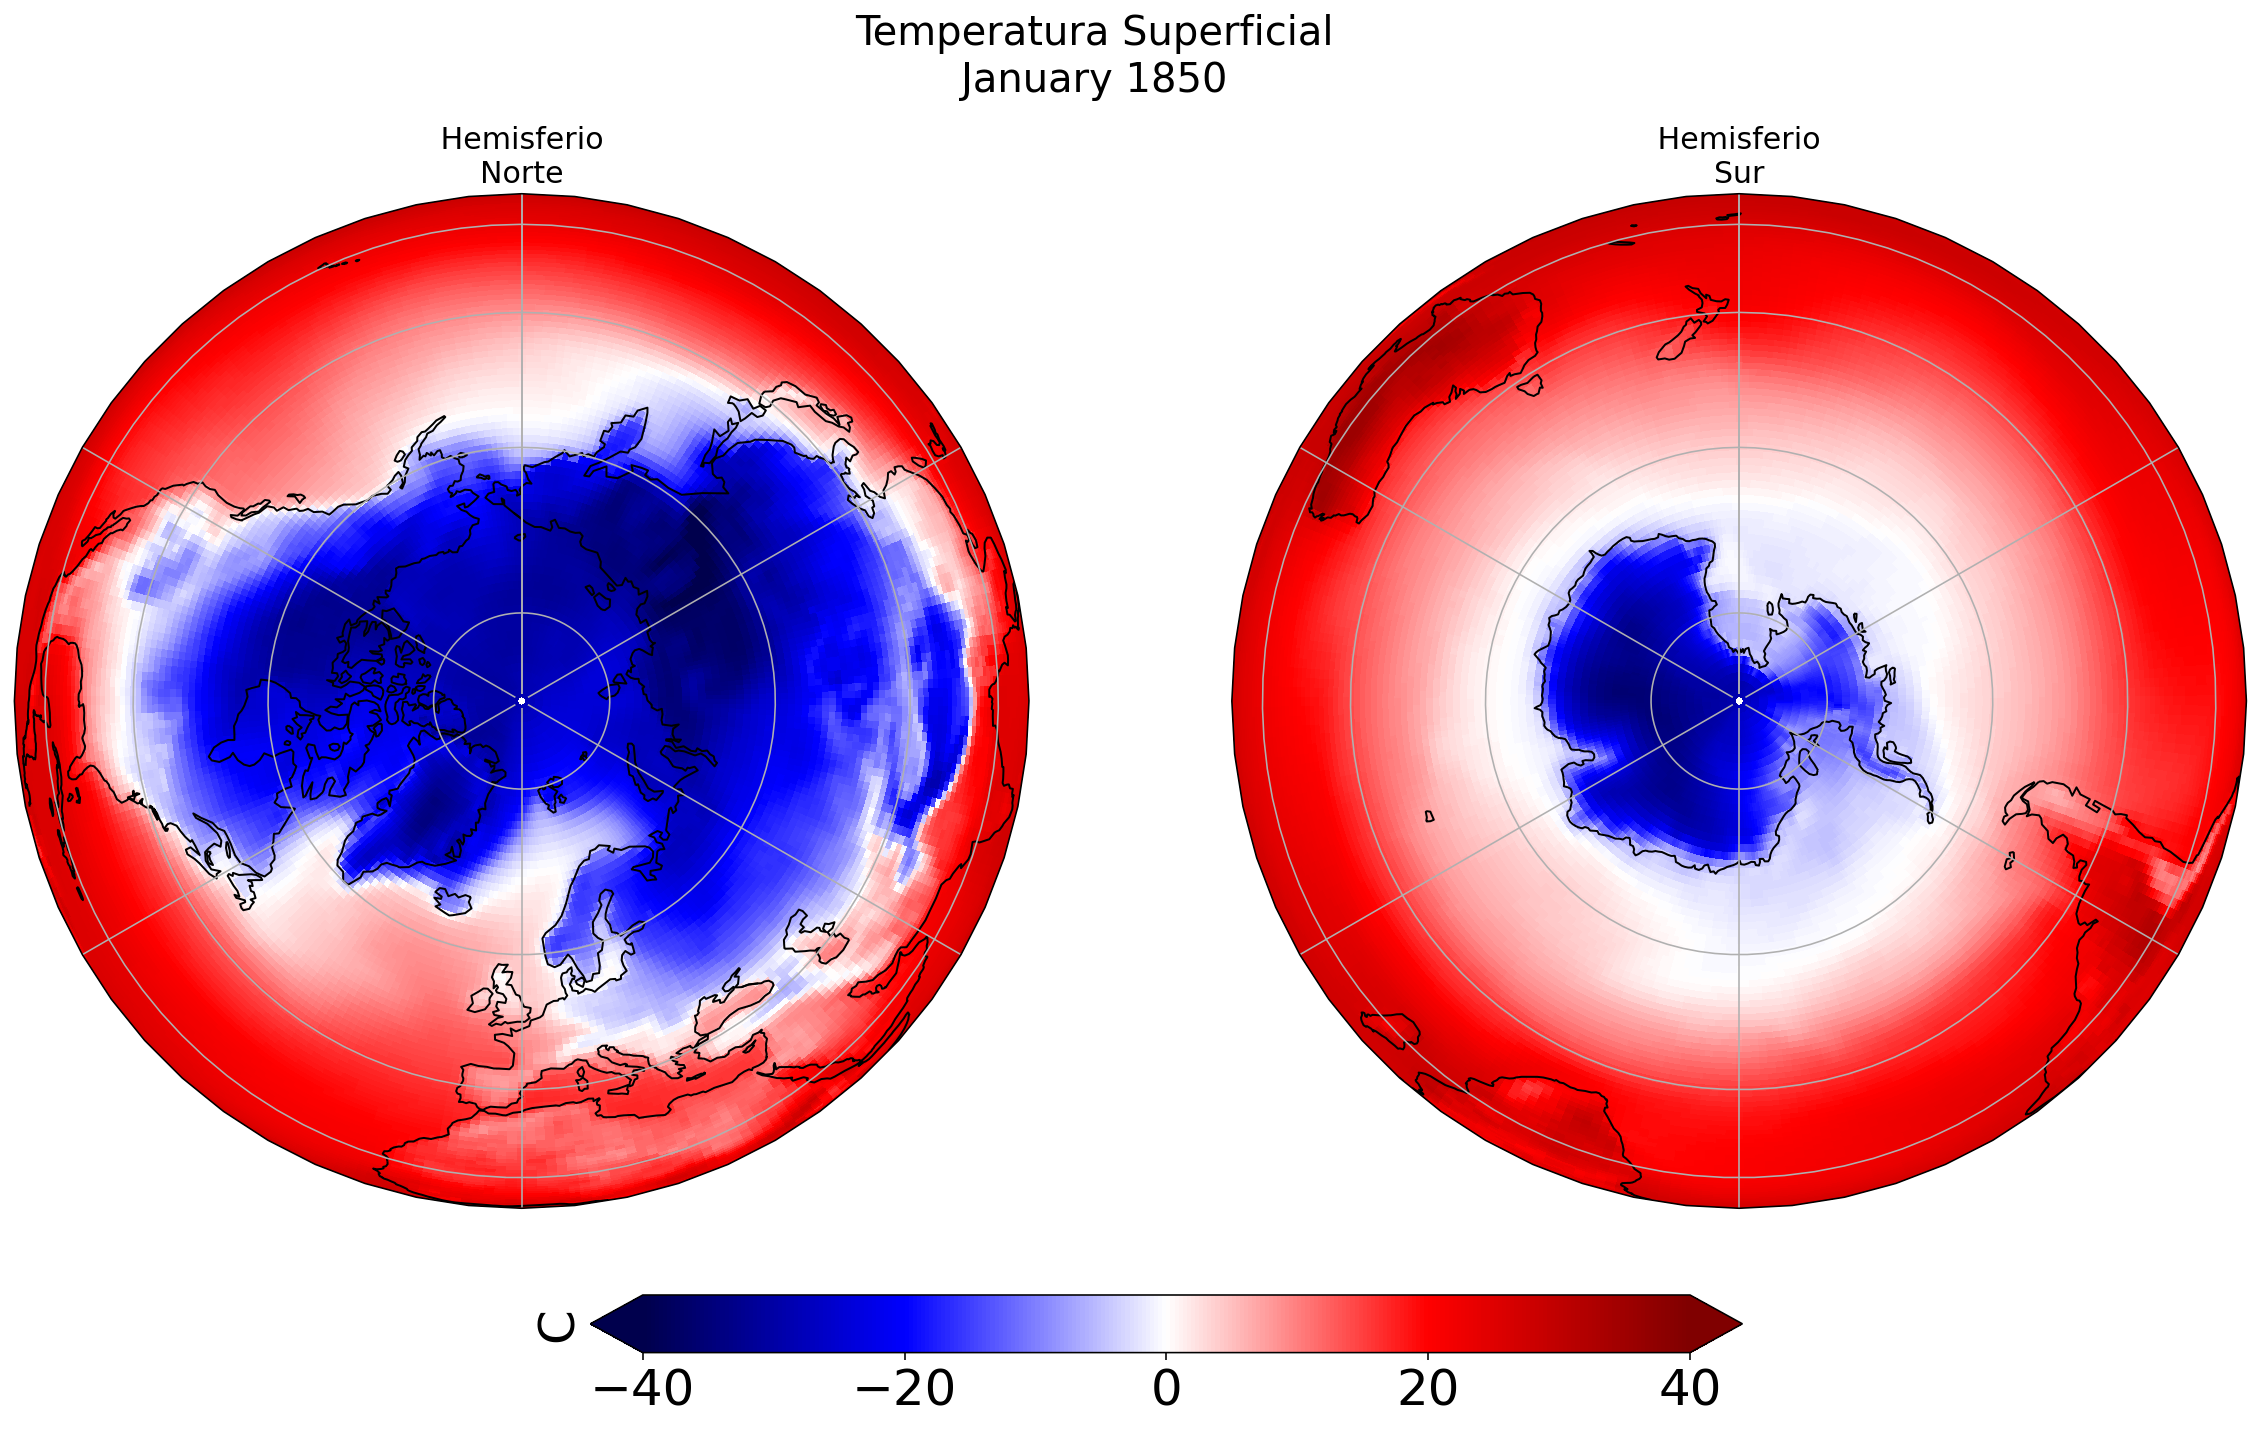

In [115]:
fig = plt.figure(1, figsize=[20,10])

# Fix extent
minval = -40
maxval = 40

# Plot 1 for Northern Hemisphere subplot argument (nrows, ncols, nplot)
# here 1 row, 2 columns and 1st plot
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# Plot 2 for Southern Hemisphere
# 2nd plot 
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

tsel = 0
for ax,t in zip([ax1, ax2], ["Norte", "Sur"]):
    map = dset['tas'].isel(time=tsel).plot(ax=ax, vmin=minval, vmax=maxval, 
                                           transform=ccrs.PlateCarree(), 
                                           cmap='seismic', 
                                           add_colorbar=False)
    ax.set_title(" Hemisferio \n" + t, fontsize=15)
    ax.coastlines()
    ax.gridlines()

# Title for both plots
fig.suptitle('Temperatura Superficial\n' + dset.time.values[tsel].strftime("%B %Y"), fontsize=20)


cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel('C', fontsize=25)


fig.savefig("Temperatura_Superficial_hemisferios1.png")

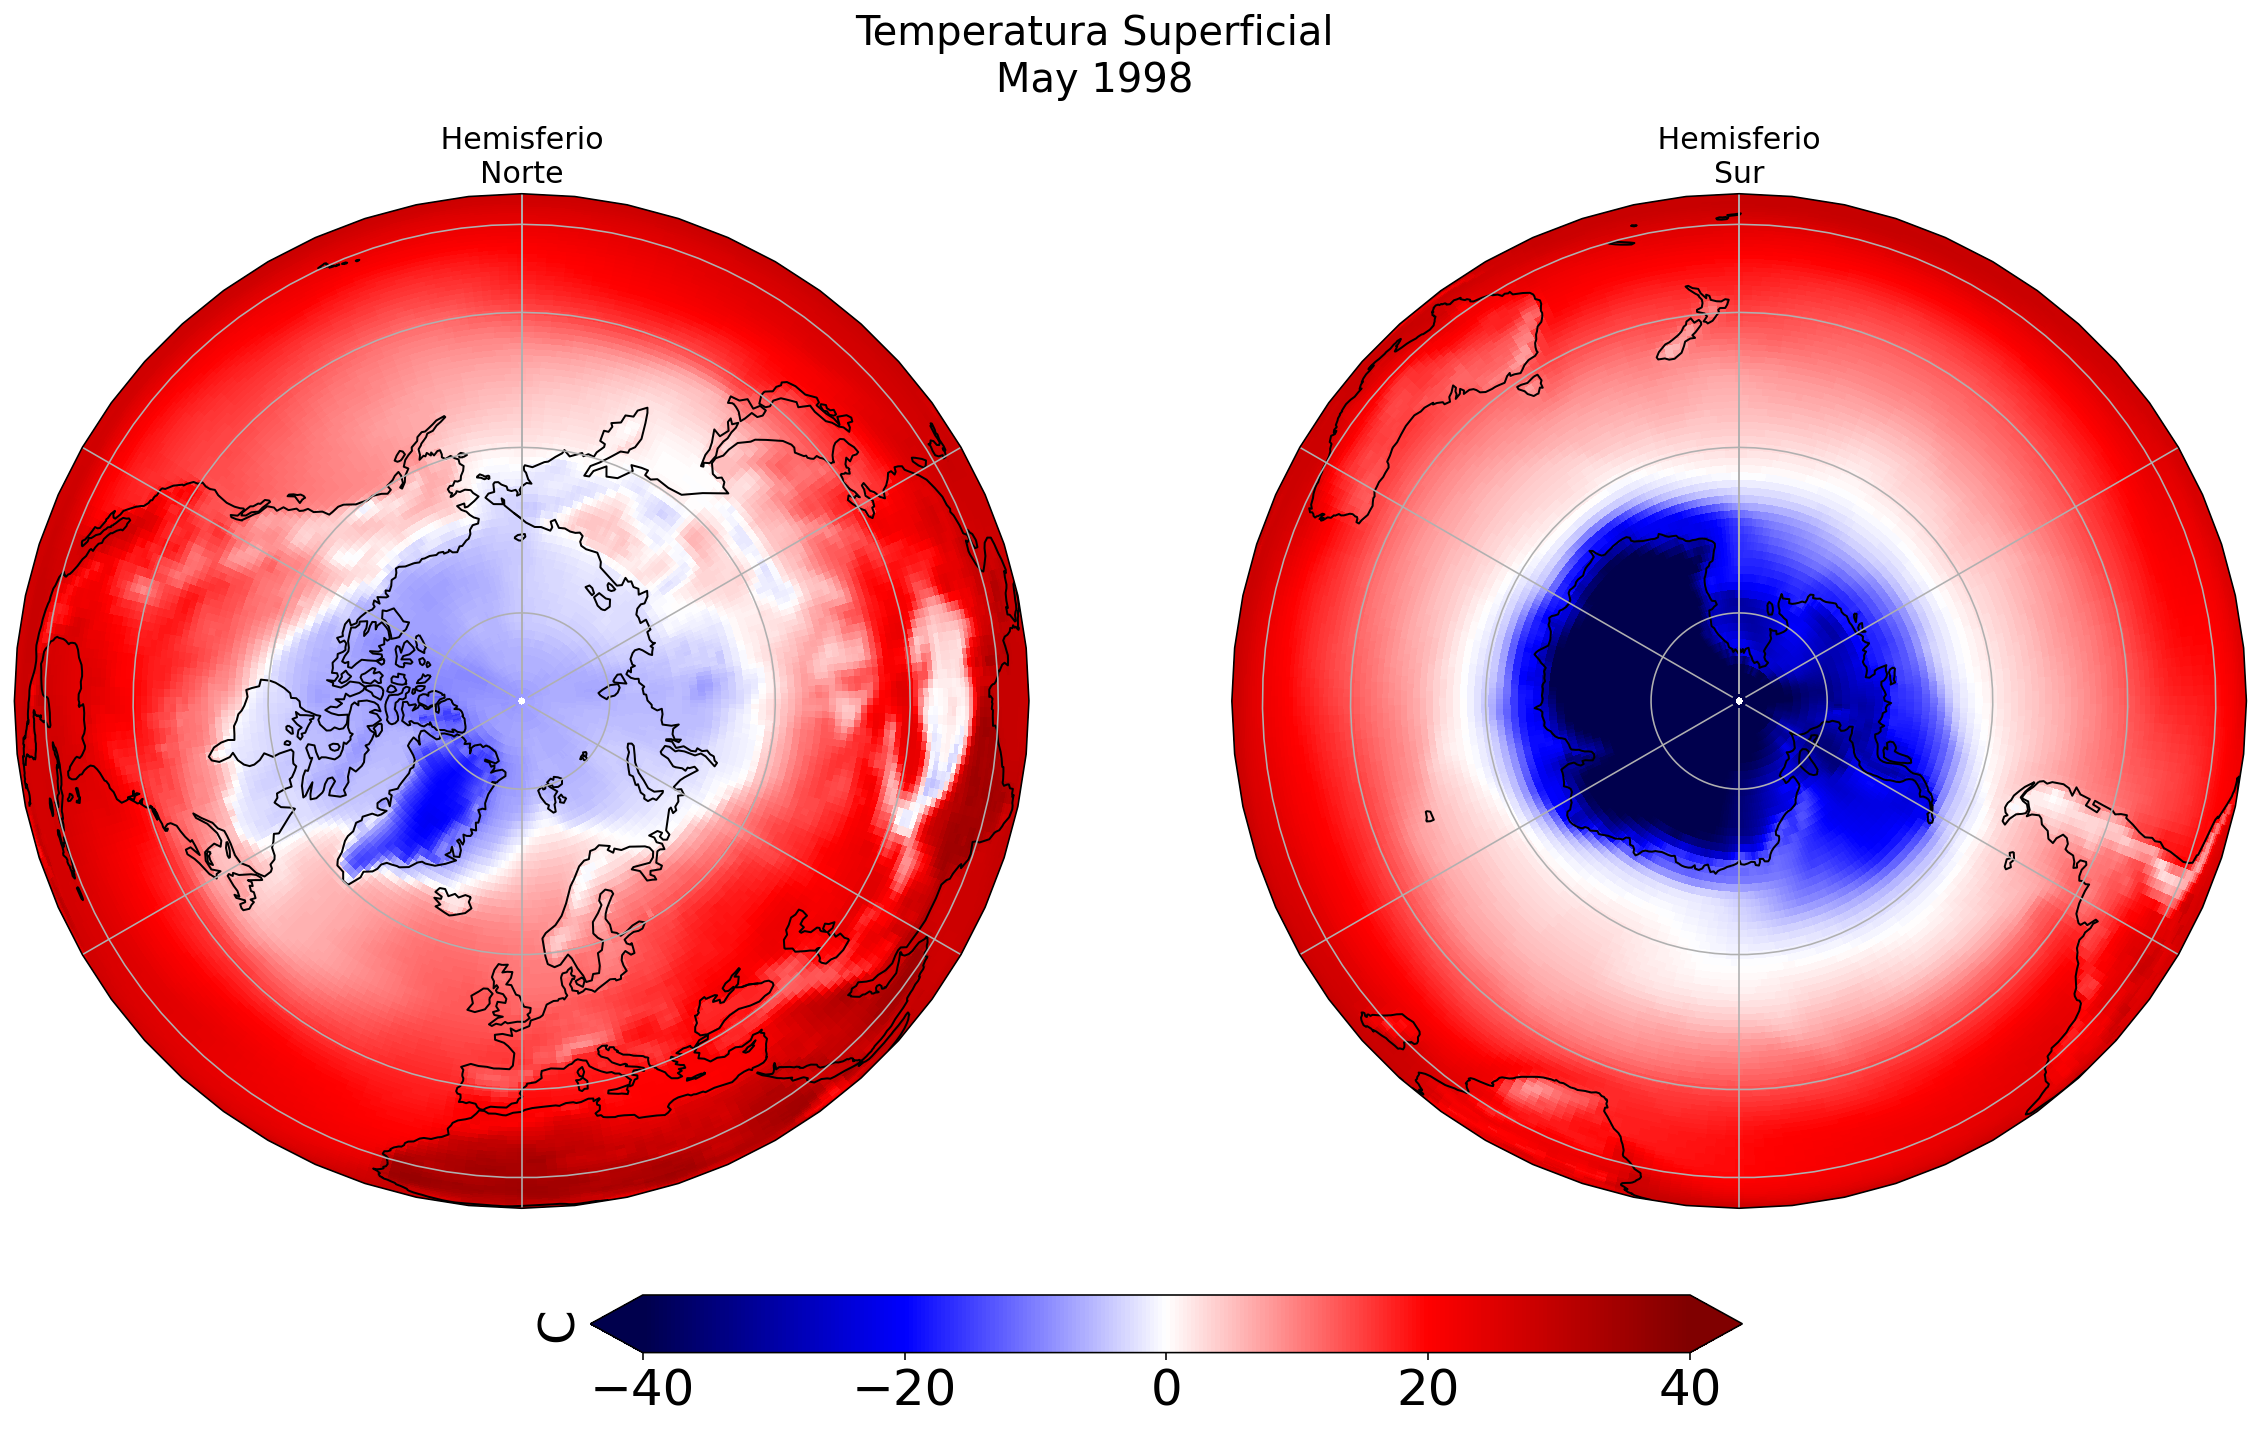

In [116]:
fig = plt.figure(1, figsize=[20,10])

# Fix extent
minval = -40
maxval = 40

# Plot 1 for Northern Hemisphere subplot argument (nrows, ncols, nplot)
# here 1 row, 2 columns and 1st plot
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# Plot 2 for Southern Hemisphere
# 2nd plot 
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

tsel = 1780
for ax,t in zip([ax1, ax2], ["Norte", "Sur"]):
    map = dset['tas'].isel(time=tsel).plot(ax=ax, vmin=minval, vmax=maxval, 
                                           transform=ccrs.PlateCarree(), 
                                           cmap='seismic', 
                                           add_colorbar=False)
    ax.set_title(" Hemisferio \n" + t, fontsize=15)
    ax.coastlines()
    ax.gridlines()

# Title for both plots
fig.suptitle('Temperatura Superficial\n' + dset.time.values[tsel].strftime("%B %Y"), fontsize=20)


cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel('C', fontsize=25)

fig.savefig("Temperatura_Superficial_hemisferios2.png")